### Unsupervised Learning with K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('customers.csv')
data = data.set_index("ID")
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


The data presents customer details for Sex, Marital satus, Age, Education, Income, Occupation and Settlement size.
The sex column is encode as Male=0, Female=1, Marital status is encoded Yes =1, No=0
The Income column is in the unit of US Dollars.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
data.groupby(by='Sex')['Age'].count()

Sex
0    1086
1     914
Name: Age, dtype: int64

In [6]:
data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

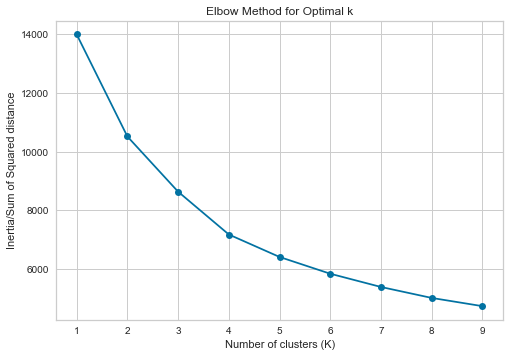

In [8]:
# Using the elbow method to find the optimal (k) number of clusters
# Inertia is the sum of squared distance

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o',color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia/Sum of Squared distance')
plt.show()

From the graph the Elbow method for optimal K = 4

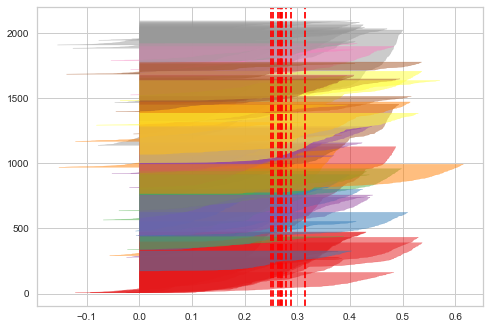

In [9]:
# Using the silhouette score to find the optimal number of clusters

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(X)
    silhouette_scores.append(visualizer.silhouette_score_)

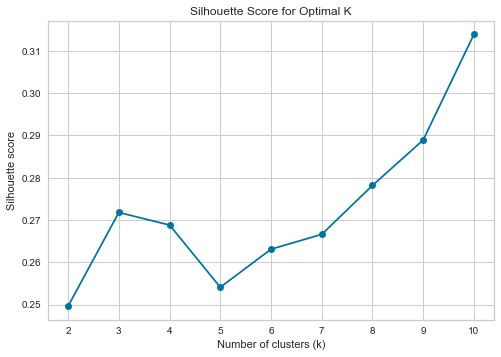

In [10]:
plt.plot(range(2, 11), silhouette_scores, marker='o',color='b')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [11]:
# Choose the optimal number of clusters
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
data['cluster'] = kmeans.labels_
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.columns[:-1])
centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.004274,5.551115e-16,36.927350,0.675214,141806.596154,1.252137,1.512821
1,0.834034,1.000000e+00,30.733193,1.123950,97098.056723,0.399160,0.004202
2,0.471545,6.747967e-01,56.016260,2.146341,160517.764228,1.174797,1.150407
3,0.362031,3.885781e-16,35.527594,0.743929,98133.229581,0.335541,0.041943
4,0.658263,9.831933e-01,28.103641,1.008403,127123.117647,1.131653,1.305322


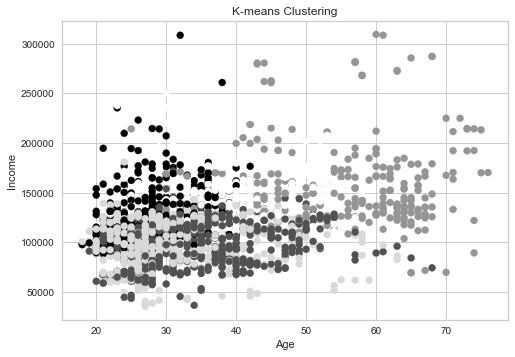

In [13]:
# Plot the clusters using two features
plt.scatter(data['Age'], data['Income'], c=data['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-means Clustering')
plt.show()

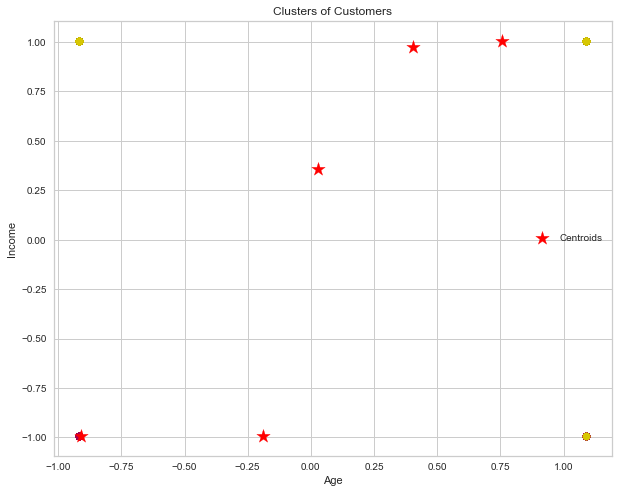

In [14]:
# Get the cluster labels
labels = kmeans.labels_
# Plot each cluster
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50)
    
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='red', label='Centroids')
    
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()